# Books Recommendation system using clustering
Collaborative filtering

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('datasets/Books.csv')

C:\Users\K.Mohammad\AppData\Local\Temp\ipykernel_13128\989608242.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('datasets/Books.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [5]:
# !curl "http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg" --out.png
# !curl http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg --output some.jpg

In [6]:
books.shape

(271360, 8)

In [7]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

#### Conclution:
Here Image URL columns is important for the poster. So, we will keep it

In [8]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [9]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [11]:
# Now load the second dataframe

users = pd.read_csv('datasets/Users.csv')

In [12]:
users.head()

,User-ID,Location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
users.shape

(278858, 3)

In [14]:
# Now load the third dataframe

ratings = pd.read_csv('datasets/Ratings.csv')

In [15]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
ratings.shape

(1149780, 3)

## Preprocessing Data

In [17]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [18]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [19]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [20]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [21]:
ratings

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### Datasets:
Now we have 3 dataframes
- Books
- Users
- Ratings

In [22]:
print(books.shape, users.shape, ratings.shape, sep='\n')

(271360, 6)
(278858, 3)
(1149780, 3)


# EDA

In [23]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [24]:
ratings['user_id'].value_counts().shape

(105283,)

In [25]:
ratings['user_id'].unique().shape

(105283,)

### Collaborative Filtering

## Step-1) Extract users and ratings of more than 200

In [26]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200

In [27]:
x[x].shape

(899,)

In [28]:
y= x[x].index

In [29]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [30]:
ratings = ratings[ratings['user_id'].isin(y)]

In [31]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [32]:
ratings.shape

(526356, 3)

## Step-2) Merge ratings with books

In [33]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN')

In [34]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [35]:
ratings_with_books.shape

(487671, 8)

## Step-3) Extract books that have received more than 50 ratings.

In [36]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [37]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [38]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [39]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [40]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [41]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [42]:
final_rating.shape

(487671, 9)

In [43]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [44]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [45]:
final_rating.shape

(61853, 9)

In [46]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [47]:
final_rating.shape

(59850, 9)

In [48]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


## Step-4) Create Pivot Table

In [49]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values= 'rating')

In [50]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [51]:
book_pivot.shape

(742, 888)

In [52]:
book_pivot.fillna(0, inplace=True)

In [53]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
ratings

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


### Data Visualizations

Text(0.5, 1.0, 'Top 20 author with number of books')

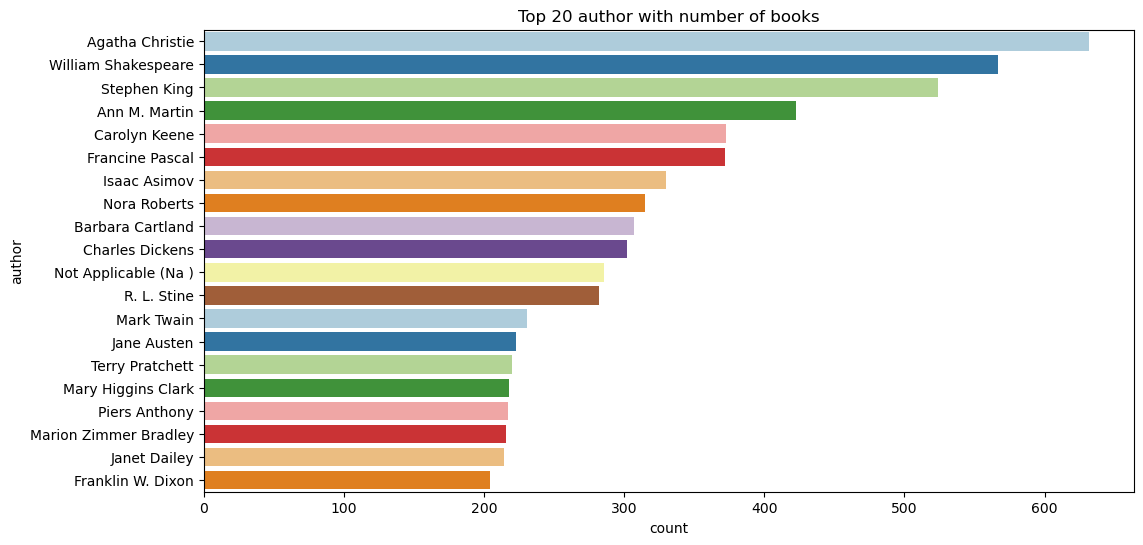

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(y="author",palette = 'Paired', data=books,order=books['author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

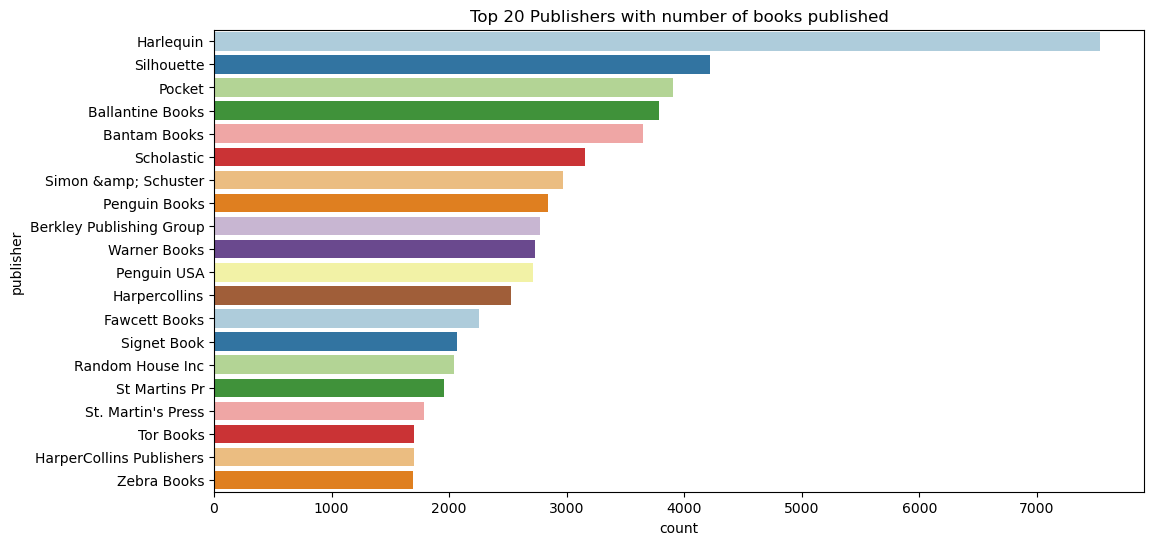

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=books,order=books['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

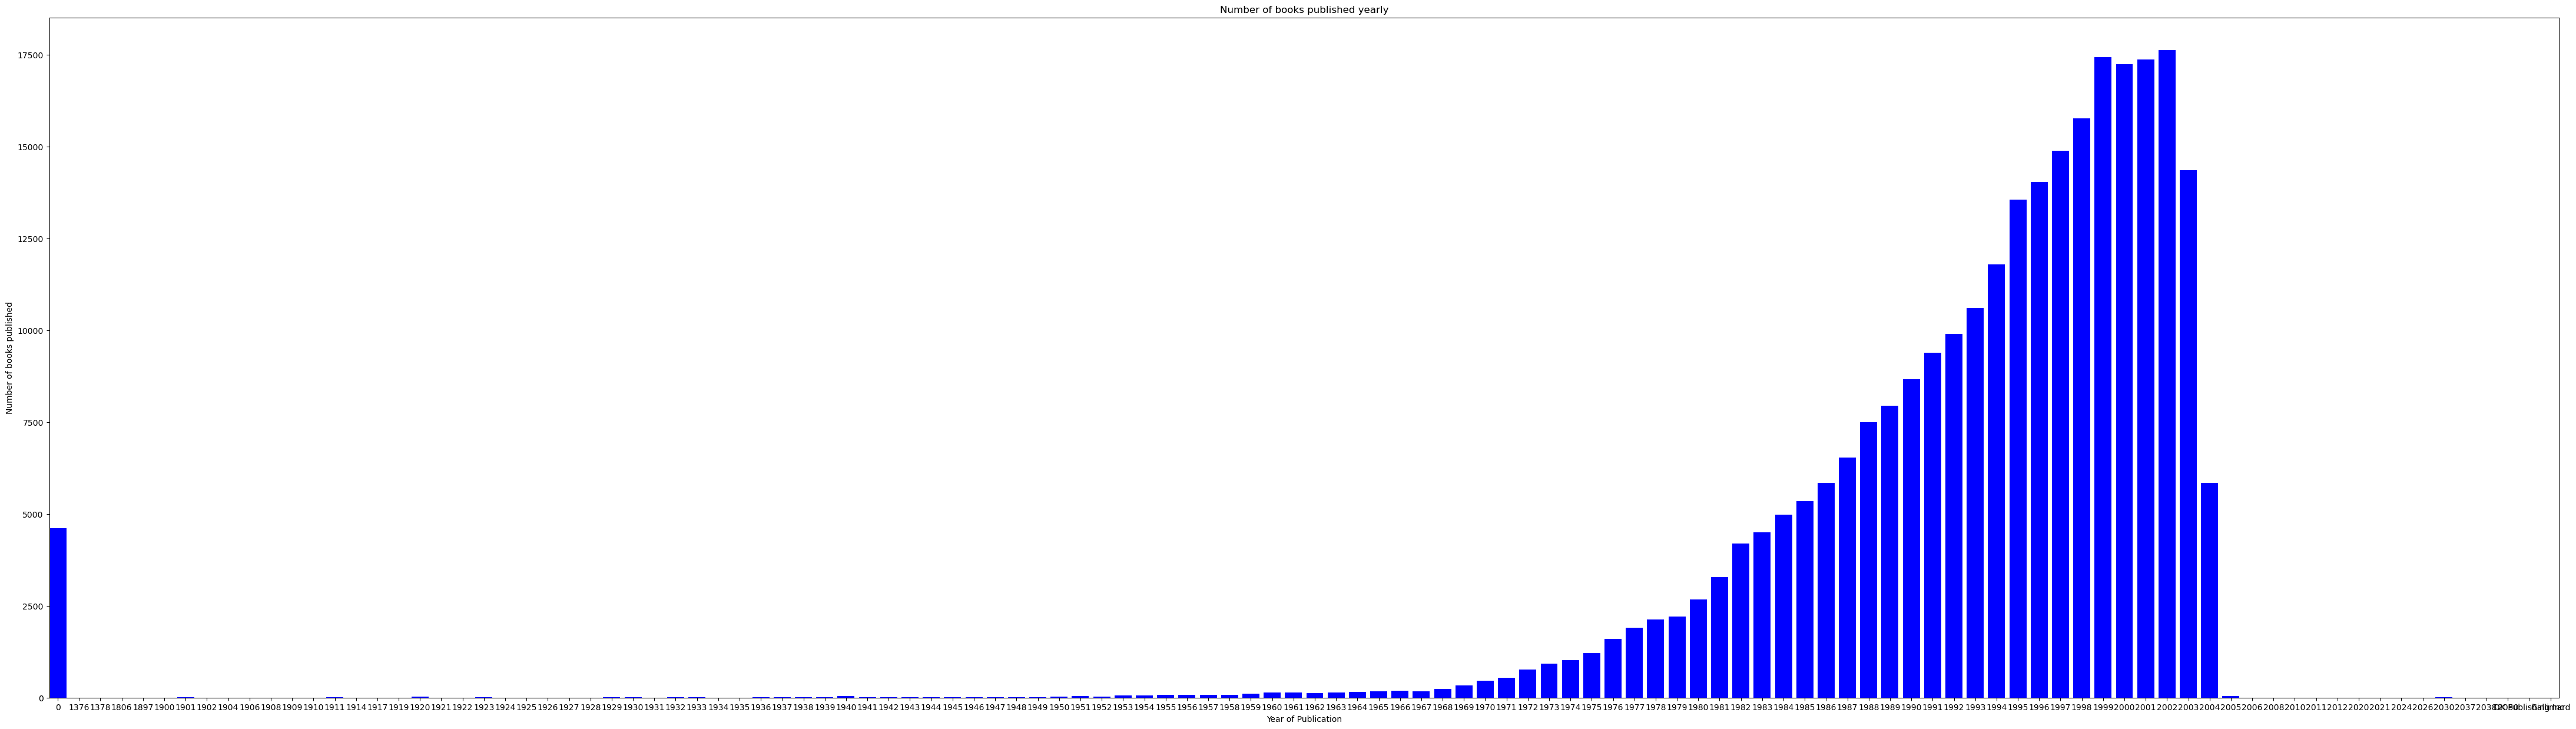

In [57]:
publications = {}
for year in books['year']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

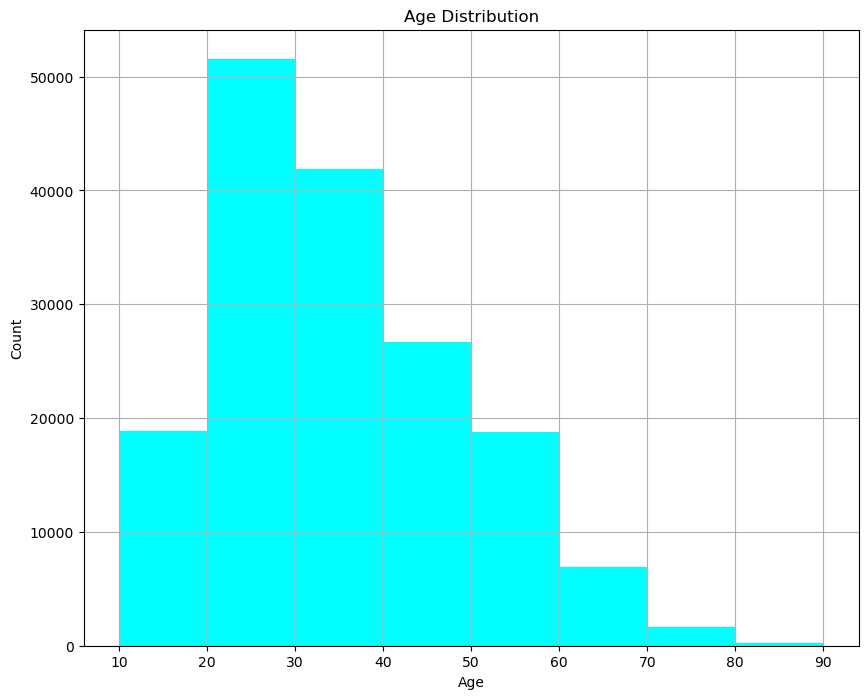

In [58]:
plt.figure(figsize=(10,8))
users.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

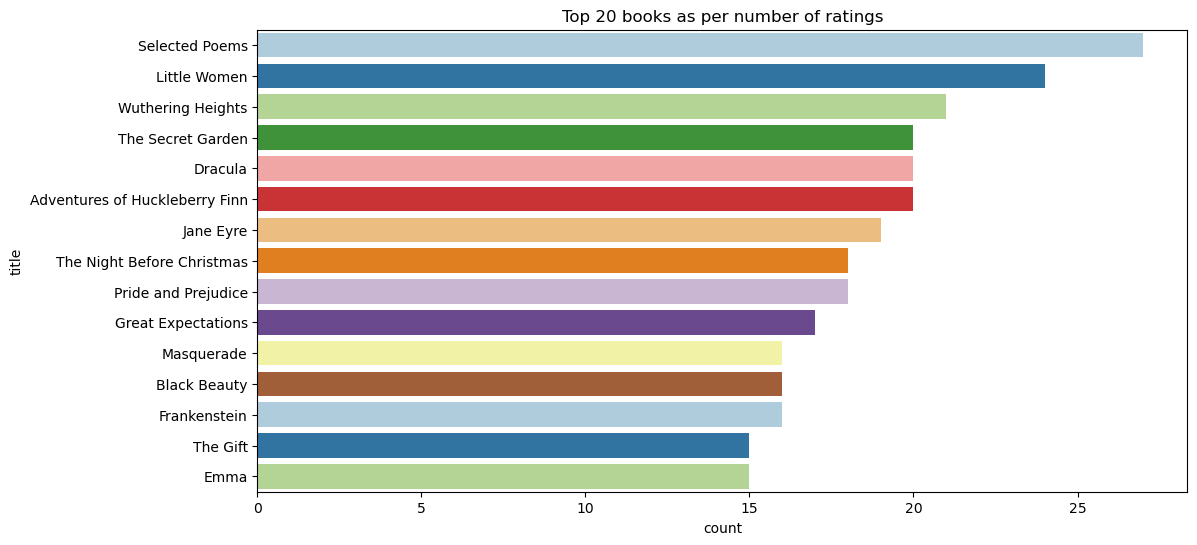

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(y="title",palette = 'Paired',data= books, order=books['title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<Axes: xlabel='rating', ylabel='count'>

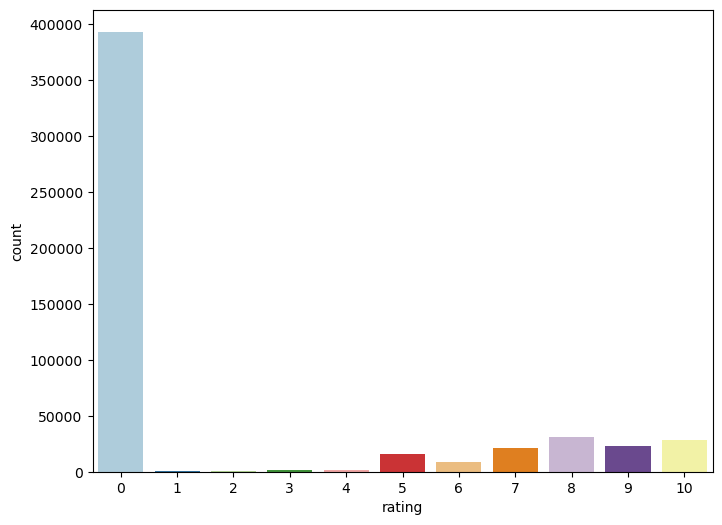

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating",palette = 'Paired',data= ratings)

<Axes: xlabel='rating', ylabel='count'>

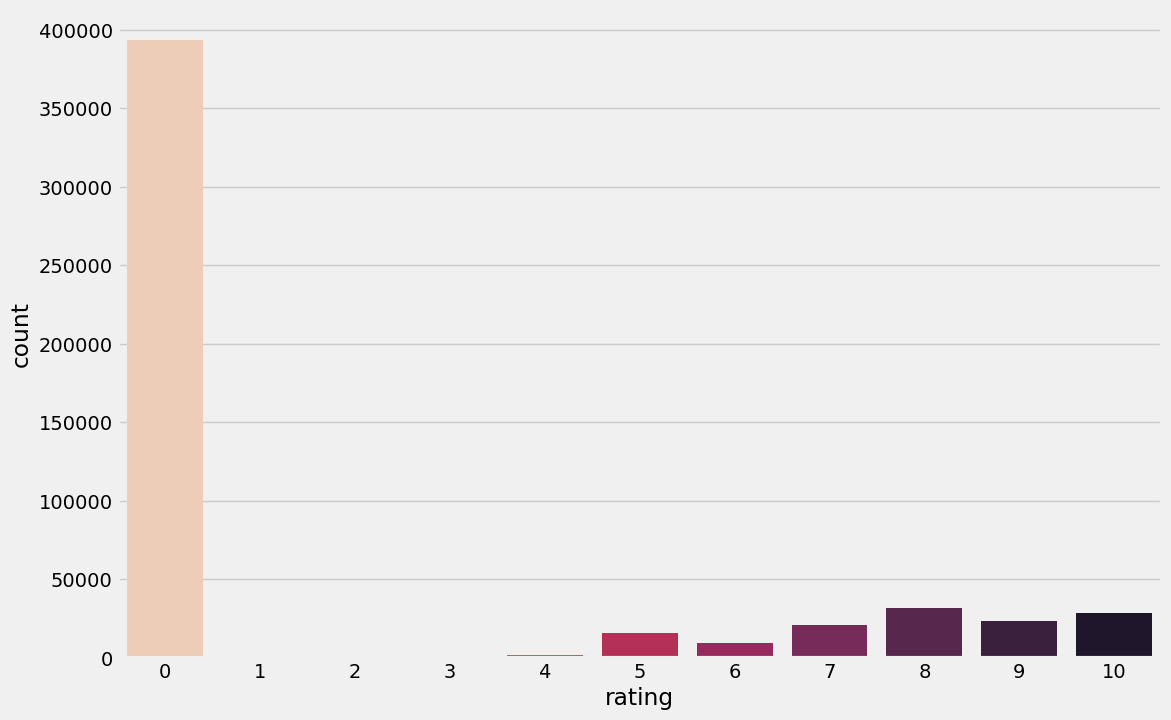

In [61]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings , x='rating', palette='rocket_r')

### Collaborative Filtering

# Model Building

# Training Model

In [62]:
from scipy.sparse import csr_matrix

In [63]:
book_sparse = csr_matrix(book_pivot)

In [64]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [65]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [66]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [67]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [68]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [69]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [70]:
book_pivot.iloc[241,:]

user_id
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Sorcerer's Stone (Book 1), Length: 888, dtype: float64

In [71]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [72]:
book_pivot.columns[5]

3757

In [73]:
#keeping books name
user_ids = book_pivot.columns

In [74]:
user_ids[5]

3757

In [75]:
np.where(book_pivot.columns == 3757)[0][0]

5

In [76]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# find url

In [77]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['user_id'] == 3757)[0][0]

In [78]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/8401491029.01.LZZZZZZZ.jpg'

In [79]:
user_id = []
for book_id in suggestion:
    user_id.append(book_pivot.columns[book_id])
    

In [80]:
user_id[0]

Int64Index([85701, 86202, 85757, 86243, 67840, 172030], dtype='int64', name='user_id')

In [81]:
book_id

array([237, 240, 238, 241, 184, 536], dtype=int64)

In [82]:
ids_index = []
for name in user_id[0]: 
    # Find the index of the book in the 'final_rating' DataFrame
    ids = np.where(final_rating['user_id'] == name)[0][0]
    # Append the index to the 'ids_index' list
    ids_index.append(ids)

In [83]:
for idx in ids_index:
    # Retrieve the 'image_url' for the current index
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0316776963.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0060930535.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0060934417.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg


In [84]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(user_ids,open('artifacts/user_ids.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

# Testing model

In [85]:
user_id

[Int64Index([85701, 86202, 85757, 86243, 67840, 172030], dtype='int64', name='user_id')]

In [86]:
def recommend_book(user_id):
    book_id = np.where(book_pivot.columns == user_id)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == user_id:
                    print(f"You searched '{user_id}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [87]:
user_id = 3757
recommend_book(user_id)

A Bend in the Road
Exclusive
The Cradle Will Fall
No Safe Place
Family Album
Last Man Standing


In [88]:
user_id

3757